# Pandas -- Series and DataFrames

Main source: https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

#### Pandas is a library for fast and efficient computation on big datasets. As in Numpy, many operations in Pandas are vectorized and thus efficient and fast.

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks (-> relational algebra) and spreadsheet programs.

In [ ]:
# Just as we import numpy usually as np, we import pandas under the alias of pd. 
# We'll import numpy as well, because we'll need it often when using pandas
import numpy as np
import pandas as pd

## The Pandas Series Object
A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [ ]:
# missing values 
data = pd.Series([0.25, 0.5, np.NaN, 1.0])
data

In [ ]:
type(data)

In [ ]:
data.values, type(data.values)

In [ ]:
#The index is an array-like object of type pd.Index
data.index, type(data.index), list(data.index)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [ ]:
data[1:3]

In [ ]:
type(data[1])

In [ ]:
print(dir(data))

### Series as generalized NumPy array

From what we've seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'd', 'c'])
data

In [ ]:
data.index = list("AbCD")
data

In [ ]:
data["b"] == data[1]

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[3, 7, 3, 4])
data

When an explicit index is present, it is preferred! (*as long as we don't slice!*)

In [ ]:
data[3]

In [ ]:
type(data[3])

### Series as specialized dictionary

In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [ ]:
population['California':'Illinois']
# note that Illinois is included!

### Constructing Series objects

In [ ]:
# data can be a scalar
pd.Series(5, index=[100, 200, 300])

In [ ]:
# data can be a dictionary, in which index defaults to the sorted dictionary keys:
ser = pd.Series({2:'a', 1:'b', 3:'c'})
ser

In [ ]:
ser.to_dict()

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the DataFrame. Like the Series object, it can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary. We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. 



To demonstrate this, let's first construct a new Series listing the area of each of the five states discussed in the previous section:

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

Now that we have this along with the population Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area,
                       'country': 'USA'})
print(states.dtypes)
states

This looks like a generalized dictionary! The keys are the names of the state, and the values are like a list [area, gountry, population]

In [ ]:
states.sort_values(by="population", ascending=False)

In [ ]:
states.loc[states["population"].idxmax()]

In [ ]:
states.index

In [ ]:
states.columns

In [ ]:
states.values

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

## DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [ ]:
states["area"]
# note that indexing a DataFrame with square brackets gets the *column*!

In [ ]:
type(states["area"])

### Constructing DataFrame objects

A Pandas DataFrame can be constructed in a variety of ways:

#### From a single Series object

A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series:

In [ ]:
pd.DataFrame(population, columns=['population'])

#### From a list of dicts 

Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data. Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., "not a number") values:

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:


In [ ]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

# Data Indexing and Selection

From the numpy lecture, we already know about indexing, slicing, masking, and fancy indexing:

In [ ]:
a = np.arange(16).reshape(4,4)
a

In [ ]:
a[:, [1, 3]][a[:, [1, 3]] % 3 == 0]
# Takes those values of the second and fourth column that are divisible by 3

Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. The corresponding patterns in Pandas are very similar to those of numpy, though there are a few quirks to be aware of.

## Data Selection in Series


### Series as dictionary

Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values, which means most of the corresponding functions work just as well for them:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

In [ ]:
'b' in data

In [ ]:
data.keys() == data.index

In [ ]:
list(data.items())

In [ ]:
data['e'] = 1.25
data

### Series as one-dimensional array

Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, slices, masking, and fancy indexing. Examples of these are as follows:

In [ ]:
# slicing by explicit index
data['a':'c']

In [ ]:
# slicing by implicit integer index
data[0:2] 
# Notice that when slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice, 
# while when slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

In [ ]:
# masking
data[(data > 0.3) & (data < 0.8)]

In [ ]:
# fancy indexing
data[['a', 'e']]

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[1, 2, 3, 4])
data

In [ ]:
data[1:3]

If your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

In [ ]:
# explicit index when indexing
data[1]

In [ ]:
# implicit index when slicing
data[1:3]

The **loc** attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data.loc[1]

In [ ]:
data.loc[1:3]

The **iloc** attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

Please, save yourself the pain and be always explicit about what you do -- use ``.loc`` and ``.iloc``

In [ ]:
%%bash
python -c "import this" | grep "Explicit"

## Data Selection in DataFrame

Recall that a DataFrame acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of Series structures sharing the same index. These analogies can be helpful to keep in mind as we explore data selection within this structure.

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

Note that if we index a DataFrame, we index the **column**!!

In [ ]:
# Dictionary-style indexing results in a Series....
print(type(data["area"]))
data["area"]

In [ ]:
# We can also dereference, though it leads to side-effects if that's actually also a method...
data.area

In [ ]:
type(data.values)

With this picture in mind, many familiar array-like observations can be done on the DataFrame itself. For example, we can transpose the full DataFrame to swap rows and columns:

In [ ]:
data.T

For array-style indexing, Pandas again uses the loc and iloc indexers mentioned earlier. Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the DataFrame index and column labels are maintained in the result:

In [ ]:
data.iloc[:3, :2]

In [ ]:
data.loc[:'Illinois', :'pop']

In [ ]:
data.loc[:,['area','pop']]

So, this is how we get a row!

In [ ]:
data.loc["California", :]

In [ ]:
# adding a new column.. (vectorized calculations!)
data['density'] = data['pop'] / data['area']
# we can combine masking with fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

While indexing refers to columns, slicing refers to rows:

In [ ]:
data['area']

In [ ]:
data['Florida':'Illinois']

Again, rather be explicit about your indexing to save yourself from a lot of confusion.

In [ ]:
data['area':'pop']

In [ ]:
data.loc[:, 'area':'pop']

Fast access to a single member using **at**

In [ ]:
%%timeit
data.loc['Florida', 'pop']

In [ ]:
%%timeit
data.at['Florida', 'pop']

### Boolean Indexing

In [ ]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df['E'] = ["one", "two", "three"] * 2
df

In [ ]:
df[df['E'].isin(['one','two'])] = np.NaN
df

In [ ]:
pd.isna(df).any(axis=1)

In [ ]:
df[~df.isna().any(axis=1)]

In [ ]:
df.dropna(how="any")

## Pandas indexing

While Pandas does provide objects that natively handle three-dimensional and four-dimensional data, a far more common pattern in practice is to make use of `hierarchical indexing` (also known as `multi-indexing`) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

In [ ]:
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop

### MultiIndex as extra dimension: stack() and unstack()

You might notice something else here: we could easily have stored the same data using a simple ``DataFrame`` with index and column labels.
In fact, Pandas is built with this equivalence in mind. The ``unstack()`` method will quickly convert a multiply indexed ``Series`` into a conventionally indexed ``DataFrame``:

In [ ]:
pop.unstack()

In [ ]:
popdf = pop.unstack(level=0)
popdf

In [ ]:
popdf.stack()

### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the ``reset_index`` method.
Calling this on the population dictionary will result in a ``DataFrame`` with a *state* and *year* column holding the information that was formerly in the index.
For clarity, we can optionally specify the name of the data for the column representation:

In [ ]:
pop

In [ ]:
pop.index.names = ['state', 'year']
pop

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

Often when working with data in the real world, the raw input data looks like this and it's useful to build a ``MultiIndex`` from the column values.
This can be done with the ``set_index`` method of the ``DataFrame``, which returns a multiply indexed ``DataFrame``:

In [ ]:
pop_df = pop_flat.set_index(['state', 'year'])
pop_df

In [ ]:
pop_df.rename_axis([None, None])

In [ ]:
pop_df.rename_axis([None, None]).unstack()

In [ ]:
pop_flat

In [ ]:
pop_df2 = pop_flat.set_index('state').rename_axis(None)
pop_df2

In [ ]:
pop_df.reset_index()

# Reading Series and DataFrames

In [ ]:
%%bash
head Pokemon.csv

In [ ]:
df = pd.read_csv("Pokemon.csv")

Imagine someboy gave you a random dataset. You don't know any of its contents. What are the first steps you do?

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df["Type 1"].value_counts()

In [ ]:
df = pd.read_csv("Pokemon.csv", index_col=0)
df.tail()

In [ ]:
df.reset_index().tail()

In [ ]:
no_duplicates = df.reset_index().drop_duplicates(subset="#").reset_index().drop("index", axis=1)
no_duplicates.tail()

In [ ]:
no_duplicates.set_index("#").to_csv('Pokemon_no_duplicates.csv')
#no_duplicates.to_excel('Pokemon_no_duplicates.xlsx', sheet_name='Sheet1')

In [ ]:
%%bash
head Pokemon_no_duplicates.csv

In [ ]:
gen_one = no_duplicates[no_duplicates["Generation"] == 1].set_index("#")
gen_one.tail()

In [ ]:
first_gen_dict = gen_one["Name"].to_dict()

for index, (key, val) in enumerate(first_gen_dict.items()):
    print(key, ":", val)
    if index > 8: 
        break

# Ufuncs and Aggregation

## Aggregation in Pandas

Aggregations are functions, where one or more dimensions of data are collapsed onto a single value, like the `max`, `sum` or `mean`- functions.

Stat-operations generally *exclude* missing data.
### For Series

In [ ]:
a = np.arange(7)
ser = pd.Series(a**2, index=a)
ser

In [ ]:
ser.sum()
#mean(), median(), min(), max(), ...

### For DataFrames

In [ ]:
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

In [ ]:
df.mean()

In [ ]:
df.mean(1)

In [ ]:
df.mean(axis='columns')

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

## Ufuncs


We know Ufuncs already from Numpy: It are vectorized functions that change all values of an array simultaneously. 

Pandas does the same, with a nice twist: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

In [ ]:
np.exp(df)

### UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data.

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
print(area)
print(population)

In [ ]:
area/population

In [ ]:
"divide" in dir(pd.DataFrame)

In [ ]:
area.divide(population, fill_value=0)

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

In [ ]:
B = pd.DataFrame(rng.randint(0, 20, (3, 3)),
                 columns=list('ABC'))
B

In [ ]:
A+B

## apply()

While some ufuncs (like cumsum or exp) are pre-defined by pandas, the method `apply` can be used to run an arbitrary function on all elements of a Series or DataFrame.

In [ ]:
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

In [ ]:
df.cumsum()

In [ ]:
df["A_cumsum"] = df.cumsum()["A"]
df["B_cumsum"] = df.apply(np.cumsum)["B"]
df

Using Lambda-functions, we can combine `apply` with arbitrary functions. Note that the argument of the function is always an entire column of the dataset.

In [ ]:
df.apply(lambda x: print(x))

In [ ]:
df.apply(lambda x: x.max() - x.min())

Note that `apply` works for both DataFrames and Series!

In [ ]:
df["A"].apply(lambda x: print(x))

In [ ]:
df["A_normed"] = df["A"].apply(lambda x: x/df["A"].mean())
df

We can even use dictionaries with the apply-function!

In [ ]:
z_moves = {"Normal": "Breakneck Blitz", "Fighting": "All-Out Pummeling", "Flying": "Supersonic Skystrike", "Poison": "Acid Downpour", "Ground": "Tectonic Rage", "Rock": "Continental Crush", "Bug": "Savage Spin-Out", "Ghost": "Never-Ending Nightmare",
"Steel": "Corkscrew Crash", "Fire": "Inferno Overdrive", "Water": "Hydro Vortex", "Grass": "Bloom Doom", "Electric": "Gigavolt Havoc", "Psychic": "Shattered Psyche", "Ice": "Subzero Slammer", "Dragon": "Devastating Drake", "Dark": "Black Hole Eclipse", "Fairy": "Twinkle Tackle"}
df = pd.read_csv("Pokemon.csv")
df.head()

In [ ]:
df["Z-Move"] = df["Type 1"].apply(lambda x:z_moves[x])
df.head()

# Group-By

While simple operations are already pre-defined by pandas, custom aggregations and operations can be performed via **group-by**. The group-by operation can be described as having the following steps:

* **Splitting** the data into groups based on some criteria (breaking up and grouping depending on the value of a key)
* **Applying** a function to each group independently (aggregation, transformation, filtering, ...)
* **Combining** the results into a data structure

A typical example, for where the *apply* is a summerization aggregation, is illustrated here:

![](split-apply-combine.png)

In [ ]:
df = pd.DataFrame(np.array([list("ABCABC"), np.arange(1,7)]).T, columns=["key", "data"])
df["data"] = pd.to_numeric(df["data"])
df

In [ ]:
df.groupby("key")

Notice that what is returned is not a set of `DataFrames`, but a `DataFrameGroupBy` object. This object is where the magic is: you can think of it as a special view of the `DataFrames`, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this `DataFrameGroupBy` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [ ]:
df.groupby("key").sum().reset_index()

In [ ]:
df.groupby("key")["data"].sum()
# we can do column indexing just like on a normal DataFrame

#### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [ ]:
for (key, _) in df.groupby("key"):
    print(key)
    
print()
for (_, group) in df.groupby("key"):
    print(group, "\n")

#### Dispatch methods

Any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [ ]:
df.describe()

In [ ]:
df.groupby("key").describe()

### Aggregate, filter, transform, apply

So far, we focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

#### Aggregation

While we used some *aggregation-functions* already, the function `aggregate` is the explicit version thereof.  
It can take a string, a function, or a list thereof, and compute all the aggregates at once.

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [ ]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

#### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

df

In [ ]:
df.groupby('key').std()

In [ ]:
df.groupby('key').filter(filter_func)

#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

First, remember our ``apply`` from before:

In [ ]:
df["data1"] = df["data1"].apply(lambda x: x/df["data1"].mean())
df

Keep in mind that ``groupby`` only returns a *view of the original DataFrame*.  
Here is an ``apply()`` that normalizes the first column by the sum of the second:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sums = df.groupby('key')["data2"].sum()
print(sums)
for key, group in df.groupby('key'):
    group["data1"] /= sums[key]
    try:
        newdf = newdf.append(group)
    except:
        newdf = group.copy()

newdf

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df

In [ ]:
df.groupby('key').apply(norm_by_data2)

Video tutorial from Pycon 2015

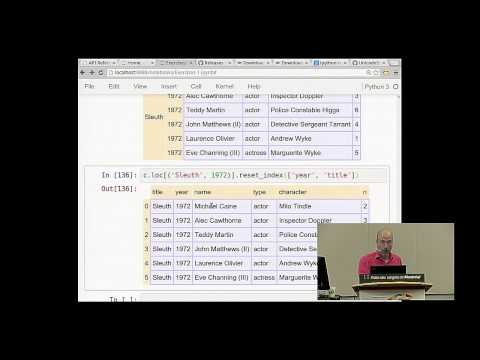

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5JnMutdy6Fw')